# Семинар 1. Использование $l_1$ векторной нормы

## Задача удаления шума

- Дано зашумлённое изображение $X_{noise}$
- Предположим, что оно получено с помощью добавления случайного шума $\varepsilon$ к исходному изображению $X_{origin}$ 

$$ X_{noise} = X_{origin} + \varepsilon $$

- Необходимо каким-то образом восстановить исходное изображение $\hat{X}_{origin}$:
    - $\hat{X}_{origin}$ должно несильно отличаться от данного зашумлённого изображения $X_{noise}$
    - в нём не должно быть шума
- Первое условие означает, что норма разности между изображениями мала
- Что означает второе условие?

#### Чем зашумлённая картинка отличается от исходной?



- Соседние пиксели имеют близкие значения
- Это значит, что 

$$\sum_{i, j = 1}^n|X_{ij} - X_{i+1,j}| + |X_{ij} - X_{i, j+1}| = \|\nabla X\|_1$$

- Таким образом, малость первой нормы градиента изображения может обеспечить минимум шума

### Итоговая оптимизационная задача

$$ \min_X \|X_{noise} - X\|^2_F + \lambda \|\nabla X\|_1 $$

- За что отвечает коэффициент $\lambda > 0$?

In [8]:
%matplotlib inline
import numpy as np
import scipy 
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
import imageio

(-0.5, 369.5, 135.5, -0.5)

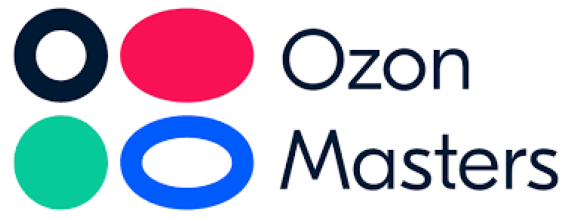

In [9]:
demo_im = imageio.imread("./ozon_masters.png")
plt.figure(figsize=(10, 8))
plt.imshow(demo_im)
plt.axis('off')

(-0.5, 369.5, 135.5, -0.5)

<Figure size 432x288 with 0 Axes>

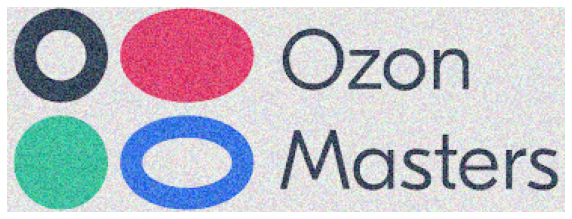

In [40]:
noisy = demo_im.copy() + demo_im.std() * np.random.random(demo_im.shape)
# noisy = demo_im.copy() + np.random.random(demo_im.shape)
noisy -= np.min(noisy)
noisy /= np.max(noisy)

plt.gray()
plt.figure(figsize=(10, 8))
plt.imshow(noisy)
plt.axis('off')

In [41]:
denoised_im = denoise_tv_chambolle(noisy, weight=1, multichannel=True)

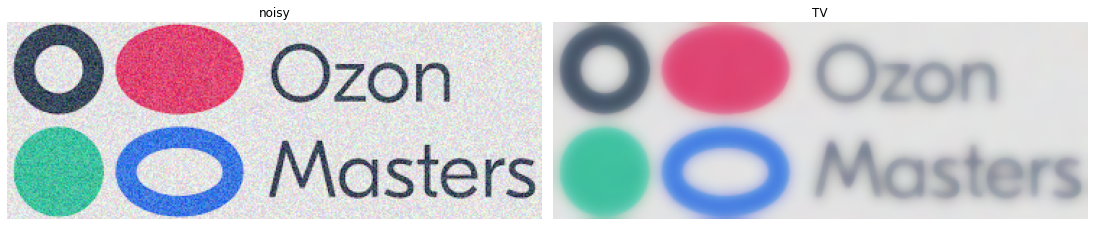

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('noisy')
ax[1].imshow(denoised_im)
ax[1].axis('off')
ax[1].set_title('TV')
fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

#### Что отражает градиент изображения?

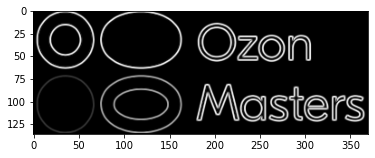

In [25]:
from skimage import filters
img_edges = filters.sobel(demo_im[:, :, 1])
plt.imshow(img_edges) 

In [52]:
lambda_trials = [2*i for i in range(1, 21)]
reconstruction_error = np.zeros(len(lambda_trials))
for i, lam in enumerate(lambda_trials):
    denoised_im = denoise_tv_chambolle(noisy, weight=lam, multichannel=True)
    reconstruction_error[i] = np.linalg.norm((demo_im - denoised_im).reshape(-1), 1)

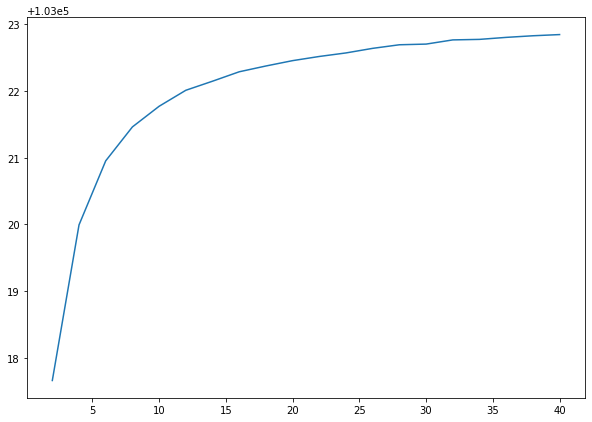

In [51]:

plt.figure(figsize=(10, 7))
plt.plot(lambda_trials, reconstruction_error)
# plt.xscale("log")